Group Member - <br/>
Shreeyash Khalate<br/>             
Batch - Data Science with Python<br/>
ML-MAJOR-JUNE-ML064B7<br/>

# Loading Dataset

In [76]:
import pandas as pd
df = pd.read_csv("odi.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


# Representing average runs scored by each country in a bar graph

In [77]:
averageruns = df.groupby(['bat_team'])["runs"].mean()

In [78]:
averageruns

bat_team
Afghanistan             103.719725
Asia XI                 150.514989
Australia               122.956547
Bangladesh              105.383375
Bermuda                  86.493213
Canada                   94.619701
England                 120.585727
Hong Kong               100.560976
India                   125.675789
Ireland                 103.182362
Kenya                    84.564852
Netherlands              92.863177
New Zealand             118.863359
Pakistan                114.268115
Papua New Guinea        110.830986
Scotland                102.031166
South Africa            124.920405
Sri Lanka               116.667119
United Arab Emirates    103.675474
West Indies             103.824277
Zimbabwe                 93.753860
Name: runs, dtype: float64

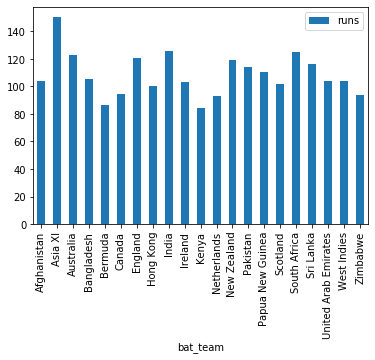

In [79]:
import matplotlib.pyplot as plt

df1 = pd.DataFrame(averageruns)

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
%matplotlib inline

df1.plot.bar()



# Handling Missing Values

In [80]:
# Calculating percentage of null values in each column and keeping track of them in a separate dictionary
column_list = list(df.columns)
mydictionary = {}
print("Percentage of null values in each column :\n")
for x in column_list:
    calc = df[x].isna().sum()/df.shape[0]*100
    #print("{} - ".format(x),calc)
    mydictionary[x] = calc

    
# Printing percentage of null values in each column
for key in mydictionary:
    print("{} - {}".format(key,mydictionary[key]))

Percentage of null values in each column :

mid - 0.0
date - 0.0
venue - 0.0
bat_team - 0.0
bowl_team - 0.0
batsman - 0.0
bowler - 0.0
runs - 0.0
wickets - 0.0
overs - 0.0
runs_last_5 - 0.0
wickets_last_5 - 0.0
striker - 0.0
non-striker - 0.0
total - 0.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
mid               350899 non-null int64
date              350899 non-null object
venue             350899 non-null object
bat_team          350899 non-null object
bowl_team         350899 non-null object
batsman           350899 non-null object
bowler            350899 non-null object
runs              350899 non-null int64
wickets           350899 non-null int64
overs             350899 non-null float64
runs_last_5       350899 non-null int64
wickets_last_5    350899 non-null int64
striker           350899 non-null int64
non-striker       350899 non-null int64
total             350899 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


So there is no column in our dataframe which has more than 50% null values in fact not a single null value. Thus no need to drop any column.

### There are no null values in any continuous numerical column.

### There are no null values in any ordinal numerical column.

### And there aren't any null values in any categorical numerical column.

# Dropping Useless Columns

In [82]:
# Dropping useless columns

df = df.drop(["mid","date","venue","bat_team","bowl_team"],axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 10 columns):
batsman           350899 non-null object
bowler            350899 non-null object
runs              350899 non-null int64
wickets           350899 non-null int64
overs             350899 non-null float64
runs_last_5       350899 non-null int64
wickets_last_5    350899 non-null int64
striker           350899 non-null int64
non-striker       350899 non-null int64
total             350899 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 26.8+ MB


In [84]:
df

,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...
350894,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203
350895,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203
350896,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203
350897,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203


# Converting useful categorical columns ("batsman" and "bowler") to numerical By :

## One Hot Encoding / Dummy Encoding

### 1. Dummy Encoding for "batsman" categorical column

In [85]:
# Computing the most frequent categorical values occurring in a "batsman" column
df.batsman.value_counts().sort_values(ascending = False).head(20)

KC Sangakkara       6822
TM Dilshan          5086
DPMD Jayawardene    4890
MS Dhoni            4484
HM Amla             4452
AB de Villiers      4413
MJ Clarke           4354
LRPL Taylor         4115
WU Tharanga         3890
RT Ponting          3543
MEK Hussey          3449
Misbah-ul-Haq       3235
Tamim Iqbal         3188
IR Bell             3154
V Kohli             3072
AD Mathews          2962
Mohammad Hafeez     2959
MJ Guptill          2943
JP Duminy           2928
SR Watson           2870
Name: batsman, dtype: int64

In [86]:
# To reduce the number of dummy variable columns, we only take top 10 most frequently occurring values in "batsman"
# column in order to produce new columns for those values
top_10 = [x for x in df.batsman.value_counts().sort_values(ascending = False).head(10).index]
top_10

['KC Sangakkara',
 'TM Dilshan',
 'DPMD Jayawardene',
 'MS Dhoni',
 'HM Amla',
 'AB de Villiers',
 'MJ Clarke',
 'LRPL Taylor',
 'WU Tharanga',
 'RT Ponting']

In [87]:
# Now we do the One Hot Encoding/Dummy Encoding on all categorical values in top_10 list to produce dummy variable columns 
import numpy as np
for label in top_10:
    df[label] = np.where(df["batsman"] == label, 1, 0)
    
df[["batsman"]+top_10].head(30)

,batsman,KC Sangakkara,TM Dilshan,DPMD Jayawardene,MS Dhoni,HM Amla,AB de Villiers,MJ Clarke,LRPL Taylor,WU Tharanga,RT Ponting
0,ME Trescothick,0,0,0,0,0,0,0,0,0,0
1,ME Trescothick,0,0,0,0,0,0,0,0,0,0
2,ME Trescothick,0,0,0,0,0,0,0,0,0,0
3,ME Trescothick,0,0,0,0,0,0,0,0,0,0
4,ME Trescothick,0,0,0,0,0,0,0,0,0,0
5,ME Trescothick,0,0,0,0,0,0,0,0,0,0
6,EC Joyce,0,0,0,0,0,0,0,0,0,0
7,EC Joyce,0,0,0,0,0,0,0,0,0,0
8,EC Joyce,0,0,0,0,0,0,0,0,0,0
9,EC Joyce,0,0,0,0,0,0,0,0,0,0


In [88]:
df

,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,KC Sangakkara,TM Dilshan,DPMD Jayawardene,MS Dhoni,HM Amla,AB de Villiers,MJ Clarke,LRPL Taylor,WU Tharanga,RT Ponting
0,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301,0,0,0,0,0,0,0,0,0,0
1,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301,0,0,0,0,0,0,0,0,0,0
2,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301,0,0,0,0,0,0,0,0,0,0
3,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301,0,0,0,0,0,0,0,0,0,0
4,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203,0,0,0,0,0,0,0,0,0,0
350895,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203,0,0,0,0,0,0,0,0,0,0
350896,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203,0,0,0,0,0,0,0,0,0,0
350897,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203,0,0,0,0,0,0,0,0,0,0


### Now our dataframe df contains its original coulmns plus the dummy variable columns for "batsman" column

### 2. Dummy Encoding for "bowler" categorical column

In [89]:
# Repeating the same procedure for "bowler" column
df.bowler.value_counts().sort_values(ascending = False).head(20)

Shahid Afridi       4780
RA Jadeja           4027
Shakib Al Hasan     3974
SL Malinga          3770
JM Anderson         3765
R Ashwin            3520
KMDN Kulasekara     3362
Abdur Razzak        3239
Mashrafe Mortaza    3216
Mohammad Hafeez     3077
MG Johnson          3067
SCJ Broad           2946
P Utseya            2934
Saeed Ajmal         2892
Harbhajan Singh     2736
Umar Gul            2733
DW Steyn            2710
DL Vettori          2615
DJ Bravo            2589
M Morkel            2582
Name: bowler, dtype: int64

In [90]:
top_10 = [x for x in df.bowler.value_counts().sort_values(ascending = False).head(10).index]
top_10

['Shahid Afridi',
 'RA Jadeja',
 'Shakib Al Hasan',
 'SL Malinga',
 'JM Anderson',
 'R Ashwin',
 'KMDN Kulasekara',
 'Abdur Razzak',
 'Mashrafe Mortaza',
 'Mohammad Hafeez']

In [91]:
for label in top_10:
    df[label] = np.where(df["batsman"] == label, 1, 0)
    
df[["bowler"]+top_10].head(30)

,bowler,Shahid Afridi,RA Jadeja,Shakib Al Hasan,SL Malinga,JM Anderson,R Ashwin,KMDN Kulasekara,Abdur Razzak,Mashrafe Mortaza,Mohammad Hafeez
0,DT Johnston,0,0,0,0,0,0,0,0,0,0
1,DT Johnston,0,0,0,0,0,0,0,0,0,0
2,DT Johnston,0,0,0,0,0,0,0,0,0,0
3,DT Johnston,0,0,0,0,0,0,0,0,0,0
4,DT Johnston,0,0,0,0,0,0,0,0,0,0
5,DT Johnston,0,0,0,0,0,0,0,0,0,0
6,D Langford-Smith,0,0,0,0,0,0,0,0,0,0
7,D Langford-Smith,0,0,0,0,0,0,0,0,0,0
8,D Langford-Smith,0,0,0,0,0,0,0,0,0,0
9,D Langford-Smith,0,0,0,0,0,0,0,0,0,0


In [92]:
df

,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,...,Shahid Afridi,RA Jadeja,Shakib Al Hasan,SL Malinga,JM Anderson,R Ashwin,KMDN Kulasekara,Abdur Razzak,Mashrafe Mortaza,Mohammad Hafeez
0,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301,...,0,0,0,0,0,0,0,0,0,0
1,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301,...,0,0,0,0,0,0,0,0,0,0
2,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301,...,0,0,0,0,0,0,0,0,0,0
3,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301,...,0,0,0,0,0,0,0,0,0,0
4,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203,...,0,0,0,0,0,0,0,0,0,0
350895,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203,...,0,0,0,0,0,0,0,0,0,0
350896,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203,...,0,0,0,0,0,0,0,0,0,0
350897,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203,...,0,0,0,0,0,0,0,0,0,0


### Now our dataframe df contains its original coulmns plus the dummy variable columns for "batsman" column plus the dummy variable columns for "bowler" column

### Now we don't need original "batsman" and "bowler" columns thus dropping them

In [93]:
# Drop "batsman" and "bowler" column from our dataframe
df = df.drop(["batsman","bowler"],axis = "columns")

In [94]:
df

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,KC Sangakkara,TM Dilshan,...,Shahid Afridi,RA Jadeja,Shakib Al Hasan,SL Malinga,JM Anderson,R Ashwin,KMDN Kulasekara,Abdur Razzak,Mashrafe Mortaza,Mohammad Hafeez
0,0,0,0.1,0,0,0,0,301,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.2,0,0,0,0,301,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0.3,4,0,0,0,301,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0.4,6,0,0,0,301,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0.5,6,0,0,0,301,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,201,8,49.2,39,0,59,18,203,0,0,...,0,0,0,0,0,0,0,0,0,0
350895,201,8,49.3,39,0,59,18,203,0,0,...,0,0,0,0,0,0,0,0,0,0
350896,201,8,49.4,38,0,59,18,203,0,0,...,0,0,0,0,0,0,0,0,0,0
350897,202,8,49.5,38,0,59,18,203,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now our dataframe is ready for modelling

# Selecting Features and Target Variable

In [95]:
Y = df["total"]

In [96]:
X = df.drop(["total"],axis=1)

In [97]:
# Performing train-test-split 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=21)

# Modelling
## 1. Linear Regression

In [98]:
# Linear Regression

from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()

linearregressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 2. Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
dectree = DecisionTreeRegressor()

In [101]:
dectree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## 2. Random Forest Regressor

In [102]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
randomforestregressor = RandomForestRegressor()

randomforestregressor.fit(X_train,Y_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Evaluate the model

In [106]:
linearregressor.score(X_test,Y_test)

0.5326505496608636

#### Thus, the accuracy for our Logistic Regression model is  - 53%

In [107]:
dectree.score(X_test,Y_test)

0.674980460529073

#### Thus, the accuracy for our Decison Tree Regressor  is  - 67%

In [108]:
randomforestregressor.score(X_test,Y_test)

0.7892609588305014

#### Thus, accuracy for our Random Forest Regressor is  - 78%

# Predicting for a new value

##### For predicting total score for a new value, we prepare new csv file say "newdata.csv" with all feature columns and a single row with new values and use that file for prediction.

In [109]:
newdf = pd.read_csv("newdata.csv")
newdf

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,KC Sangakkara,TM Dilshan,DPMD Jayawardene,...,Shahid Afridi,RA Jadeja,Shakib Al Hasan,SL Malinga,JM Anderson,R Ashwin,KMDN Kulasekara,Abdur Razzak,Mashrafe Mortaza,Mohammad Hafeez
0,53,3,10.4,35,1,31,0,0,1,0,...,0,0,1,1,0,0,1,1,1,0


### Predicting using Linear Regression

In [110]:
# Predicting using Linear Regression
Y_pred_linear=linearregressor.predict(newdf)
print(Y_pred_linear)

[252.54353282]


###### Thus our total score predicted using Logistic Regression is 252.

### Predicting using Decision Tree Regressor

In [111]:
# Predicting using Decision Tree regressor
Y_pred_dectree=dectree.predict(newdf)
print(Y_pred_dectree)

[174.]


###### Thus our total score predicted using Decision Tree Regressor is 174.

### Predicting using Random Forest Regressor

In [112]:
# Predicting using Random Forest Regressor
Y_pred_random_forest = randomforestregressor.predict(newdf)
print(Y_pred_random_forest)

[265.8]


###### Thus our total score predicted using Random Forest Regressor is 265.

Performed by Shreeyash Khalate, Data Science With Python - Verzeo Internship Final Project, ML064B7